<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>October 26, 2018: class
</small>
</div>
</p>

<br>
<br>
<div align="center">
<b>Abstract</b><br>
A (very concise) introduction to <i>SymPy</i>, with an application to <i>continued fractions</i>; <br>for a comprehensive introduction see the official tutorial https://docs.sympy.org/latest/tutorial/index.html
</div>

In [1]:
__AUTHOR__ = ("Massimo Nocentini", 
              "massimo.nocentini@unifi.it", 
              "https://github.com/massimo-nocentini/")

__SUPERVISOR__ = ("prof. Donatella Merlini", 
                  "donatella.merlini@unifi.it")

__KEYWORDS__ = ['Python', 'Fibonacci', 'Continued fractions', 'numbers', 'SymPy']

---

In [2]:
from sympy import init_printing # to render math stuff with MathJax (https://www.mathjax.org/)
from sympy import Symbol, Function, Matrix, IndexedBase # fundamentals objects to play with
from sympy.abc import * # a collection of already-defined terms, such as `alpha, a, b, x, y, t, ...`

from sympy import solve, sqrt
from sympy.plotting import plot

In [3]:
from commons import * # import our own functions, to define things in particular.

In [4]:
init_printing() # from here on we'll see nice math expressions

# Object and Meta language, expression tree and gotchas

First of all, let us introduce a concept to keep in mind, **always**. In what follows it is important to distinguish the *meta language*, which is the set of SymPy objects that denotes mathematical objects, which are the *object language*:

In [5]:
a = Symbol('a') # `a` and `Symbol` are expressions of the *meta language*
a # the $a$ is an expression of the *object language*

again, $a$ is the mathematical object that is denoted by the `a` meta object. With respect to this, have a look to some gotchas (https://docs.sympy.org/dev/gotchas.html).

In [6]:
f = Function('f') # let us build an abstract function symbol
f_t = f(t) # and apply it to symbol `t`, it is a function eventually.

In [7]:
type(f), type(f_t) # their types show us the two different states (i) unapplied and (ii) applied.

(sympy.core.function.UndefinedFunction, f)

In [8]:
isinstance(f, Function), isinstance(f_t, Function) # keep in mind that a ctor doesn't correspond to a class always

(False, True)

In [9]:
f(a) # an application in the metalanguage yield an application in the object language

# Equational reasoning and the invariant

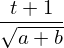

In [12]:
expression = (t+1)/sqrt(a+b) # a combination of symbols is called "expression"
expression

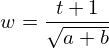

In [13]:
e_eq = define(w, expression) # enter the equational mode
e_eq # to uniform our reasonings

In [14]:
e_eq.lhs # the `lhs` says what we'are defining

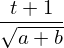

In [15]:
e_eq.rhs  # the `rhs` says how it is defined

In [16]:
e_eq.func # every SymPy object has a functional part that allows us to rebuild it

sympy.core.relational.Equality

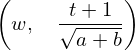

In [17]:
e_eq.args # and a description part that completes the rebuild procedure

In [18]:
type(e_eq)

sympy.core.relational.Equality

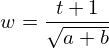

In [19]:
e_eq.func(*e_eq.args) # here the application to get the original definition back

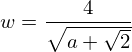

In [20]:
e_eq.subs({t:3,b:sqrt(2)}) # every symbolic term responds to the message `subs` to perform substitutions

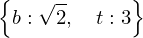

In [10]:
{t:3,b:sqrt(2)} # a substitution is just a plain Python `dict` obj

# Learn by doing

In [11]:
my_f = define(f(t), sqrt(t)+4*t, ctor=FEq) # make a definition functional
my_f

In [13]:
my_f(3) # in order to be a callable object

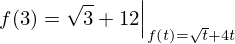

In [14]:
my_s = my_f(3, return_eq=True) # or get keep equations
my_s

In [16]:
my_s.expr # destructors properties

In [17]:
my_s.substitution()

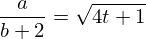

In [20]:
another_eq = define(a/(b+2), sqrt(4*t+1)) # consider another equation, which combines some symbols
another_eq

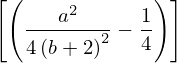

In [21]:
solve([another_eq], t) # and we want to rewrite with respect to symbol `t`

## Into the rabbit hole...

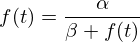

In [33]:
cf = define(f(t), alpha/(beta+f(t)), ctor=FEq) # into the rabbit hole...
cf # which stands for "Continued Fraction"

In [34]:
for k,v in cf: # every equational definition can be used as a substitution, implicitly by the `__iter__` method
    print(k) # lhs
    print(v) # rhs

f(t)
alpha/(beta + f(t))


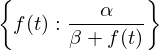

In [35]:
cf.as_substitution() # or explicitly, returning a plain `dict` object.

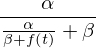

In [280]:
cf.rhs.subs(cf) # the implicit substitution allows us to call `subs` compactly

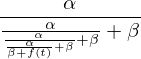

In [282]:
cf.rhs.subs(cf).subs(cf).subs(cf) # and promotes compositionality

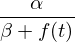

In [36]:
cf(t) # callable as usual

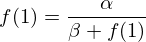

In [38]:
cf(1, return_eq=True).expr # instead of a verbose notation that carries the original definition

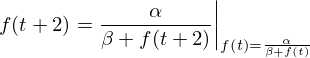

In [39]:
cf(t+2, return_eq=True) # even in the more complete form

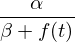

In [290]:
cf % cf.lhs # the % operator allows `cf` to be used as rewriting into the given term

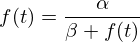

In [295]:
cf % define(cf.lhs, cf.lhs) # build *non trivial* objects, to introduce recursive definitions

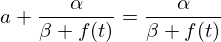

In [296]:
cf % define(cf.lhs+a, cf.lhs) # moreover, keep in mind to respect pattern matching

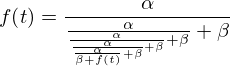

In [299]:
cf % cf % cf % cf % cf # compositionality

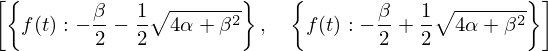

In [46]:
sols = solve([cf], f(t)) # since we've an equation, it can be solved...
sols

In [47]:
def iterapplication(F, *args, times=1):
    acc = list(args)
    for i in range(times):
        acc = [F(*acc)]
    return acc.pop()

`iterapplication(f, 3, times=k)` $\leftrightarrow \underbrace{f(f(...(f(f(3)))))}_{k}$

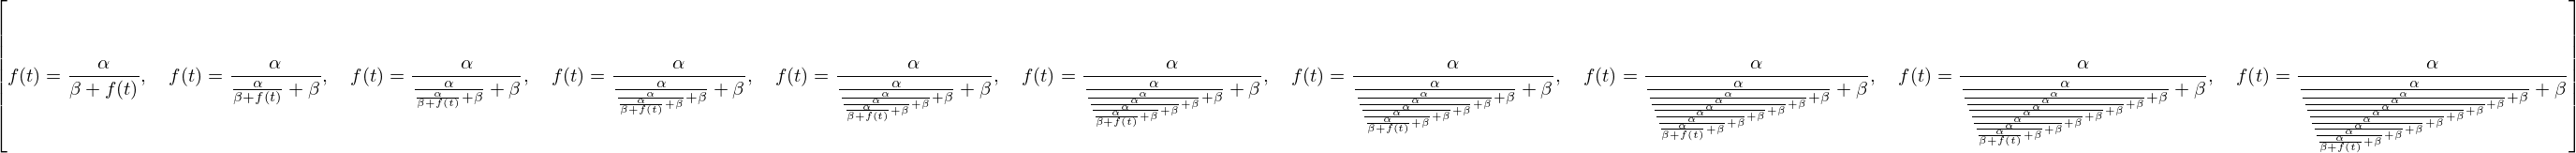

In [49]:
cfs = [iterapplication(cf.__mod__, cf, times=i) 
       for i in range(10)] # collect some iterated applications
cfs # stands for "Continued FractionS"

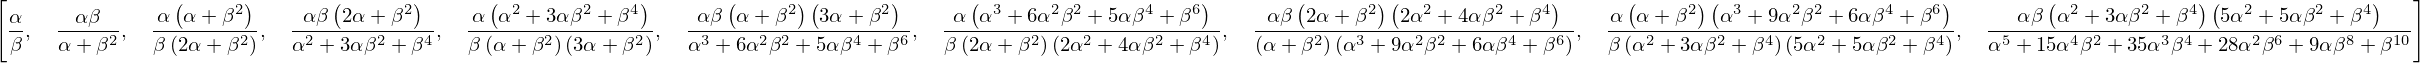

In [51]:
fs = [cf.rhs.subs({cf.lhs:0}).factor() 
      for cf in cfs] # substitute 0 for `f(t)` in each rhs
fs

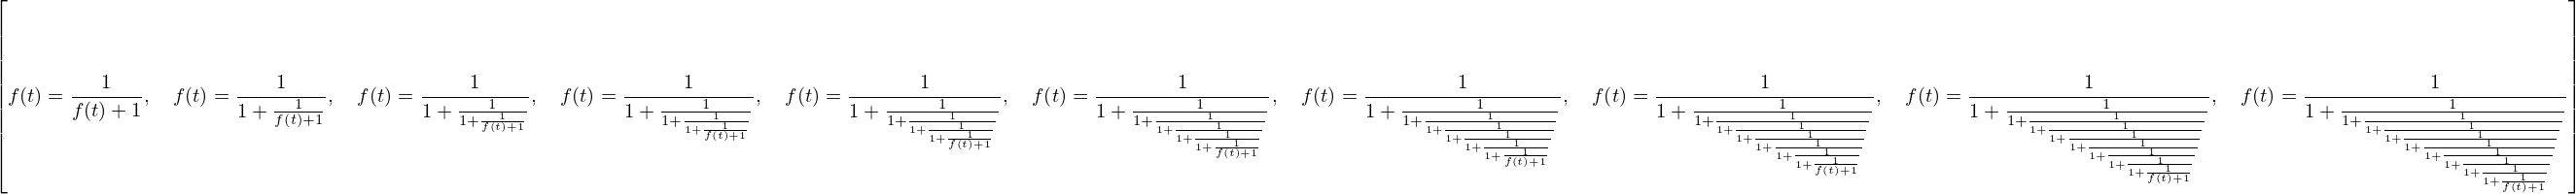

In [52]:
substitution = {alpha:1, beta:1}
cf_alpha_beta = [cf.subs(substitution) for cf in cfs] # get rid of alpha and beta, fixing both of them to 0
cf_alpha_beta

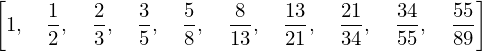

In [53]:
ratios = [cf.rhs.subs({f(t):0}) for cf in cf_alpha_beta] # substitute 0 for `f(t)` in each rhs, wow...
ratios

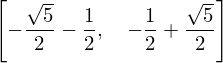

In [332]:
[s[f(t)].subs(substitution) for s in sols] # do you see nothing?

In [333]:
%matplotlib inline

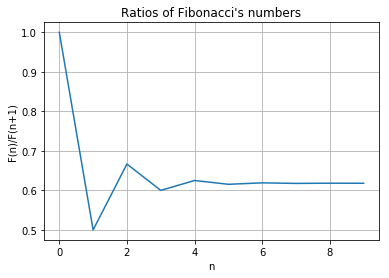

In [334]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(ratios)

ax.set(xlabel='n', ylabel='F(n)/F(n+1)',
       title='Ratios of Fibonacci\'s numbers')
ax.grid()

plt.show()

# Matrices

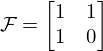

In [347]:
F = define(Symbol(r'\mathcal{F}'), Matrix([[1, 1], [1,0]])) # a simple matrix
F

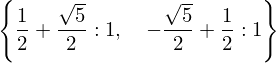

In [350]:
F.rhs.eigenvals() # ...now I see!

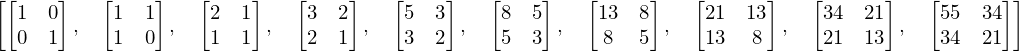

In [351]:
[F.rhs**i for i in range(10)] # Fibonacci matrices

---

In [24]:
from sympy import eye, zeros, binomial

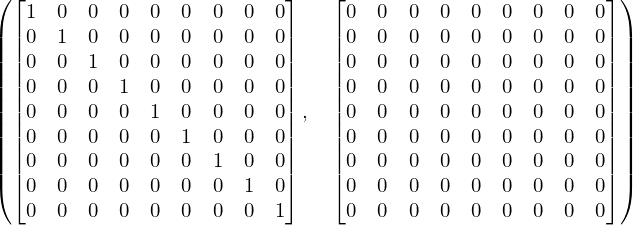

In [27]:
eye(9), zeros(9) # simple matrices constructors

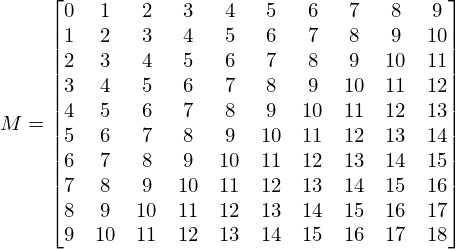

In [28]:
M = define(Symbol('M'), Matrix(10,10, lambda i,j: i+j)) # element-wise constructor
M

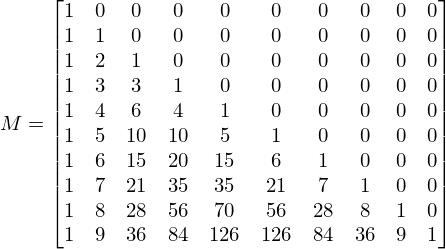

In [29]:
M = define(Symbol('M'), Matrix(10,10, binomial)) # a simple way to generate the Pascal triangle
M

In [33]:
[sum(M.rhs[i-j,j] for j in range(i+1)) # summing each incresing diagonal, 
 for i in range(M.rhs.rows)] # yield Fibonacci numbers again.

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.